In [39]:
import sys
!{sys.executable} -m pip install together matplotlib



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip


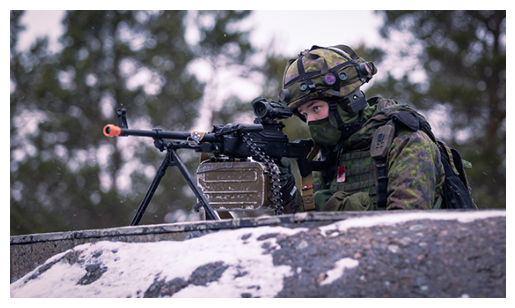

In [67]:
from PIL import Image
import matplotlib.pyplot as plt

def display_local_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

display_local_image("/Users/chetankothari/BDA_Master_Thesis_ThreatDetection_Data/Data/Images/Test_Image_Semi_Threat.jpg")

In [11]:
#Install AZURE  
!pip install azure.ai.vision.imageanalysis
!pip install pillow
!pip install azure.storage.blob
!pip install azure.cognitiveservices
!pip install azure.authetication
!pip install azure.core
!pip install azure-cognitiveservices-vision-computervision

ERROR: Could not find a version that satisfies the requirement azure.cognitiveservices (from versions: none)
ERROR: No matching distribution found for azure.cognitiveservices
ERROR: Could not find a version that satisfies the requirement azure.authetication (from versions: none)
ERROR: No matching distribution found for azure.authetication


In [2]:
!pip install azure-cognitiveservices-vision-computervision
!pip show azure-cognitiveservices-vision-computervision


Name: azure-cognitiveservices-vision-computervision
Version: 0.9.1
Summary: Microsoft Azure Cognitive Services Computer Vision Client Library for Python
Home-page: https://github.com/Azure/azure-sdk-for-python
Author: Microsoft Corporation
Author-email: azpysdkhelp@microsoft.com
License: MIT License
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: azure-common, msrest
Required-by: 


In [3]:
!pip install msrest


In [68]:
import requests
import json

# Azure endpoint and API key
AZURE_ENDPOINT = "https://ai-chetankothfin3186ai034440307201.services.ai.azure.com"
AZURE_API_KEY = "EHmLoRmjZ6TDjYB4Q2lFQc6CofuN7qVmVqMCgv53mYA0c4nhXpUrJQQJ99BAACHYHv6XJ3w3AAAAACOGqr59"  # Replace with your Azure API key
API_VERSION = "2024-05-01-preview"
MODEL_NAME = "Llama-3.2-11B-Vision-Instruct"  # Replace with your deployed model name


In [69]:
def llama32(messages, model_size=11):
  """
    Calls the Llama 3.2 model deployed on Azure for processing messages.
  """
  url = f"{AZURE_ENDPOINT}/models/chat/completions?api-version={API_VERSION}"
    
  model = f"Llama-3.2-11B-Vision-Instruct"
  
  payload = {
    "model": model,
    "max_tokens": 4096,
    "temperature": 0.2,
    "stop": ["<|eot_id|>","<|eom_id|>"],
    "messages": messages
  }
  headers = {
        "Accept": "application/json",
        "Content-Type": "application/json",
        "api-key": AZURE_API_KEY
  }
  
  res = json.loads(requests.request("POST", url, headers=headers, data=json.dumps(payload)).content)

  if 'error' in res:
    raise Exception(res['error'])

  return res['choices'][0]['message']['content']


In [70]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as img:
    return base64.b64encode(img.read()).decode('utf-8')

base64_image = encode_image("/Users/chetankothari/BDA_Master_Thesis_ThreatDetection_Data/Data/Images/Test_Image_Semi_Threat.jpg")


messages = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Describe the image!"
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image}"
        }
      }
    ]
  },
]
    

In [71]:

result = llama32(messages, model_size=11)
print(result)


The image depicts a soldier in camouflage gear, armed with a machine gun, positioned behind a wall or barrier. The soldier's attire consists of a green and brown camouflage uniform, a helmet, and a backpack. The machine gun is equipped with a scope and a chain attached to the barrel.

In the foreground, the soldier is situated behind a wall or barrier, which appears to be made of concrete or stone. The wall is covered in snow, indicating that the scene is set in a cold climate.

In the background, a row of trees is visible, suggesting that the scene is set in a wooded area. The overall atmosphere of the image conveys a sense of intensity and focus, as the soldier is intently gazing through the scope of the machine gun.


In [73]:
base64_image2 = encode_image("/Users/chetankothari/BDA_Master_Thesis_ThreatDetection_Data/Data/Images/Non_Threat.jpg")
base64_image3= encode_image("/Users/chetankothari/BDA_Master_Thesis_ThreatDetection_Data/Data/Images/Midium_Threat.jpg")

messages2 = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Describe the image!"
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image2}"
        }
      }
    ]
  },
]

messages3 = [
  {
    "role": "user",
    "content": [
      {
        "type": "text",
        "text": "Describe the image!"
      },
      {
        "type": "image_url",
        "image_url": {
          "url": f"data:image/jpeg;base64,{base64_image3}"
        }
      }
    ]
  },
]

result = llama32(messages2)
print(result)

The image shows a large green tank on display in a city street, with people gathered around it. The purpose of the image is to showcase the tank and its presence in the city.

* A large green tank is on display in a city street:
	+ The tank is positioned in the center of the image.
	+ It has a long barrel and tracks on the bottom.
	+ The tank is painted in a camouflage pattern.
* People are standing around the tank, looking at it:
	+ There are several people standing around the tank, some of whom are taking pictures.
	+ They appear to be admiring the tank and its features.
	+ Some people are standing on top of the tank, while others are standing on the ground.
* The tank has a sign that says "LEOPARD 2 A6":
	+ The sign is attached to the side of the tank.
	+ It is written in white letters on a green background.
	+ The sign provides information about the tank's model and type.

Overall, the image suggests that the tank is on display as part of a public event or exhibition, and that peop

In [74]:
result = llama32(messages3)
print(result)

The image depicts a military tank situated in a snowy field, with three individuals on top of it. The tank itself is gray and features a long barrel protruding from the left side. It is equipped with tracks and appears to be covered in snow.

On top of the tank, a man in a black uniform and hat is seen running towards the right side of the image. He is holding a knife in his right hand, which is extended behind him. To the left of the running man, two other individuals are positioned. One of them is wearing a camouflage jacket and crouching down, while the other is dressed in a dark green jacket and appears to be looking down at something.

In the background, a gray sky stretches out, with a few trees visible in the distance. The overall atmosphere of the image suggests that it may be a scene from a war or military operation, given the presence of the tank and the individuals' attire.
